<a href="https://www.kaggle.com/code/maddi007py/5-4-1-data-reduction-and-projection?scriptVersionId=227977749" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://colab.research.google.com/github/Maddi007-Py/Maddi007-Py-CrimeAnalytics_Clustering/blob/main/Code%20Sections/5.4%20Data%20Reduction%20and%20Projection%20Steps%20abcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **5.4	Data Reduction and Projection - a)	Feature Engineering, b) EDA, c) Feature Engineering & d) Data Reduction**

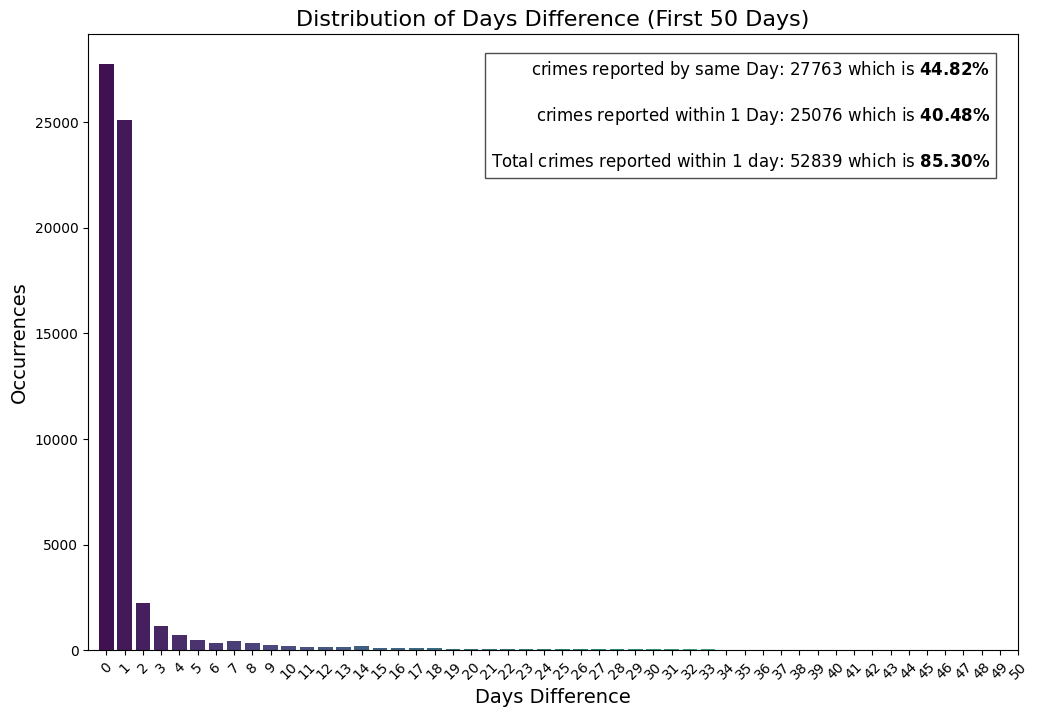

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import warnings
import pandas as pd
from IPython.display import display, HTML
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap

print("\n\n")
# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read the data from CSV file
url = "https://raw.githubusercontent.com/Maddi007-Py/Maddi007-Py-CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Cleaned_Data.csv"
df = pd.read_csv(url, parse_dates=['REPORT_DATE', 'OCC_DATE'], low_memory=False)

# Calculate the difference in days between REPORT_DATE and OCC_DATE
df['DAYS_DIFFERENCE'] = (df['REPORT_DATE'] - df['OCC_DATE']).dt.days

# Filter out invalid values (0 to 365 days)
df = df[(df['DAYS_DIFFERENCE'] >= 0) & (df['DAYS_DIFFERENCE'] <= 365)]

# Count occurrences of each 'DAYS_DIFFERENCE'
day_diff_counts = df['DAYS_DIFFERENCE'].value_counts().reset_index()
day_diff_counts.columns = ['Day #', 'Reported number']
day_diff_counts = day_diff_counts.sort_values(by='Day #')

# Create a DataFrame for days 0 to 89 (90 days total so they can be arranged in 30 rows x 3 columns)
days_range = pd.DataFrame({'Day #': range(0, 90)})
table_df = pd.merge(days_range, day_diff_counts, on='Day #', how='left')
table_df['Reported number'] = table_df['Reported number'].fillna(0).astype(int)

# Calculate totals and percentages
total_incidents = table_df['Reported number'].sum()
table_df['% Report'] = table_df['Reported number'] / total_incidents * 100
table_df['Total reported until now'] = table_df['Reported number'].cumsum()
table_df['Total % Reported'] = table_df['Total reported until now'] / total_incidents * 100

# Format numeric columns with right-justification
table_df['Reported number'] = table_df['Reported number'].map(lambda x: f"{x:>10d}")
table_df['% Report'] = table_df['% Report'].map(lambda x: f"{x:>6.2f}%")
table_df['Total reported until now'] = table_df['Total reported until now'].map(lambda x: f"{x:>10d}")
table_df['Total % Reported'] = table_df['Total % Reported'].map(lambda x: f"{x:>6.2f}%")

# Reshape the DataFrame into a grid with 3 columns and 30 rows.
n_cols = 3
n_rows = len(table_df) // n_cols  # Should be 30 rows if table_df has 90 rows

records = table_df.to_dict('records')
grid = []
for i in range(n_rows):
    row_records = []
    for j in range(n_cols):
        idx = j * n_rows + i
        row_records.append(records[idx])
    grid.append(row_records)

# Build the HTML table.
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
  <thead>
    <tr>
      <th colspan="15" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white; padding: 8px;">
        Distribution of Reporting Delays (30 rows x 3 columns)
      </th>
    </tr>
    <tr style='background-color: #4CAF50; color: white;'>
      <th><strong>Day #</strong></th>
      <th>Reported number</th>
      <th>% Report</th>
      <th>Total reported until now</th>
      <th>Total % Reported</th>
      <th style='border-left: 4px solid #dddddd;'><strong>Day #</strong></th>
      <th>Reported number</th>
      <th>% Report</th>
      <th>Total reported until now</th>
      <th>Total % Reported</th>
      <th style='border-left: 4px solid #dddddd;'><strong>Day #</strong></th>
      <th>Reported number</th>
      <th>% Report</th>
      <th>Total reported until now</th>
      <th>Total % Reported</th>
    </tr>
  </thead>
  <tbody>
"""

for row in grid:
    html_table += "<tr>"
    for j, record in enumerate(row):
        # For the Day # cell, add bold formatting.
        if j > 0:
            day_style = "border: 1px solid #dddddd; padding: 8px; text-align: right; border-left: 4px solid #dddddd; "
        else:
            day_style = "border: 1px solid #dddddd; padding: 8px; text-align: right; "
        html_table += f"<td style='{day_style}'><strong>{record['Day #']}</strong></td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['Reported number']}</td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['% Report']}</td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['Total reported until now']}</td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['Total % Reported']}</td>"
    html_table += "</tr>"
html_table += """
  </tbody>
</table>
"""

display(HTML(html_table))


# Count occurrences of each 'DAYS_DIFFERENCE'
day_diff_counts = df['DAYS_DIFFERENCE'].value_counts().reset_index()
day_diff_counts.columns = ['Days Difference', 'Occurrences']
day_diff_counts = day_diff_counts.sort_values(by='Days Difference')

# Filter for days <= 50 for the first chart
day_diff_filtered = day_diff_counts[day_diff_counts['Days Difference'] <= 50].copy()

### First Chart: Bar Plot (First 50 Days) ###
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Days Difference', y='Occurrences', data=day_diff_filtered, palette='viridis', ax=ax)
ax.set_title('Distribution of Days Difference (First 50 Days)', fontsize=16)
ax.set_xlabel('Days Difference', fontsize=14)
ax.set_ylabel('Occurrences', fontsize=14)
ax.set_xlim(-1, 50)
ax.set_xticks(day_diff_filtered["Days Difference"])  # Set tick positions explicitly
ax.set_xticklabels(day_diff_filtered["Days Difference"], rotation=45)  # Then set tick labels

# Compute totals for day 0 and day 1 based on the complete dataset
total_incidents = day_diff_counts['Occurrences'].sum()
zero_day_count = (day_diff_counts[day_diff_counts['Days Difference'] == 0]['Occurrences']
                  .sum() if not day_diff_counts[day_diff_counts['Days Difference'] == 0].empty else 0)
one_day_count = (day_diff_counts[day_diff_counts['Days Difference'] == 1]['Occurrences']
                 .sum() if not day_diff_counts[day_diff_counts['Days Difference'] == 1].empty else 0)
total_zero_one = zero_day_count + one_day_count

# Calculate percentages
percent_zero = (zero_day_count / total_incidents) * 100 if total_incidents > 0 else 0
percent_one = (one_day_count / total_incidents) * 100 if total_incidents > 0 else 0
percent_total = (total_zero_one / total_incidents) * 100 if total_incidents > 0 else 0

# Build the explanation text with three lines
# We construct the mathtext for the percentages separately so that only those values are bold.
explanation_text = (
    f"crimes reported by same Day: {zero_day_count} which is " +
    "$\\mathbf{" + f"{percent_zero:.2f}" + "\\%}$" + "\n\n" +
    f"crimes reported within 1 Day: {one_day_count} which is " +
    "$\\mathbf{" + f"{percent_one:.2f}" + "\\%}$" + "\n\n" +
    f"Total crimes reported within 1 day: {total_zero_one} which is " +
    "$\\mathbf{" + f"{percent_total:.2f}" + "\\%}$"
)

# Place the explanation text inside the graph at the top-right using axis coordinates
ax.text(0.97, 0.96, explanation_text, transform=ax.transAxes, ha='right', va='top',
        fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Save and download the chart
bar_plot_filename = '/content/EDA_First_50days.png'
plt.savefig(bar_plot_filename, bbox_inches='tight', dpi=300)
plt.show()
files.download(bar_plot_filename)

print("\n\n")
Data_Processing_df = pd.read_csv(url, low_memory=False).copy()

html_output_filename = "/content/5.4 Data Reduction and Projection.html"

# Store processing steps summary
steps_summary = []

# Step 1: Dataset Loading
before_step_1 = Data_Processing_df.shape[0]
before_columns = Data_Processing_df.shape[1]  # Columns at the time of loading dataset
steps_summary.append({
    "Step Taken": "Step 1: Load Dataset",
    "Before Action": before_step_1,
    "Affected by Action": "",
    "After Action": before_step_1,
    "Unit": "Rows"
})

# Use current row count after loading as reference for subsequent steps
current_rows = Data_Processing_df.shape[0]

# Step 2: Create datetime columns for 'REPORT_DATETIME' and 'OCC_DATETIME'
Data_Processing_df['REPORT_DATETIME'] = pd.to_datetime(Data_Processing_df['REPORT_DATE']) + pd.to_timedelta(Data_Processing_df['REPORT_HOUR'], unit='h')
Data_Processing_df['OCC_DATETIME'] = pd.to_datetime(Data_Processing_df['OCC_DATE']) + pd.to_timedelta(Data_Processing_df['OCC_HOUR'], unit='h')

# The row count remains unchanged after creating datetime columns
rows_after_datetime = Data_Processing_df.shape[0]
steps_summary.append({
    "Step Taken": "Step 2: Feature Engineering - Join the Date & Time",
    "Before Action": current_rows,
    "Affected by Action": "New Columns Added",
    "After Action": rows_after_datetime,
    "Unit": "Rows"
})

# Step 3: Calculate the reporting delay (days + hours only)
reporting_timedelta = Data_Processing_df['REPORT_DATETIME'] - Data_Processing_df['OCC_DATETIME']
Data_Processing_df['reporting_delay_days'] = reporting_timedelta.dt.days
Data_Processing_df['reporting_delay_hours'] = (reporting_timedelta.dt.seconds // 3600)  # Convert seconds to full hours

# The row count remains unchanged after calculating delays
rows_after_delay_calc = Data_Processing_df.shape[0]
steps_summary.append({
    "Step Taken": "Step 3: Feature Engineering: Compute Reporting Delay in Days & Hours",
    "Before Action": rows_after_datetime,
    "Affected by Action": "New Columns Added",
    "After Action": rows_after_delay_calc,
    "Unit": "Rows"
})

# Step 4: Filter records with reporting delays between 0 to 60 days
before_delay_filter = Data_Processing_df.shape[0]
Data_Processing_df = Data_Processing_df[
    (Data_Processing_df['reporting_delay_days'] >= 0) &
    (Data_Processing_df['reporting_delay_days'] <= 1)
].copy()
after_delay_filter = Data_Processing_df.shape[0]
delay_filtered_rows = before_delay_filter - after_delay_filter

steps_summary.append({
    "Step Taken": "Step 4: Only Keep Complaints with 0-60 Days Delay",
    "Before Action": before_delay_filter,
    "Affected by Action": delay_filtered_rows,
    "After Action": after_delay_filter,
    "Unit": "Rows"
})

# Step 5: Drop unnecessary columns
columns_to_drop = ['REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW',
                   'HOOD_140', 'NEIGHBOURHOOD_140', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY',
                   'REPORT_DATE', 'OCC_DATE', 'REPORT_HOUR', 'REPORT_DATETIME']
columns_before_drop = Data_Processing_df.shape[1]

# Store column names before dropping
dropped_column_names = [col for col in columns_to_drop if col in Data_Processing_df.columns]

# Drop columns
Data_Processing_df = Data_Processing_df.drop(columns=dropped_column_names).copy()
columns_after_drop = Data_Processing_df.shape[1]
dropped_columns = columns_before_drop - columns_after_drop

steps_summary.append({
    "Step Taken": "Step 5: Dropped Unnecessary Columns",
    "Before Action": columns_before_drop,
    "Affected by Action": dropped_columns,
    "After Action": columns_after_drop,
    "Unit": "Columns"
})

# Step 6: Save the final processed data
Data_Processing_df.to_csv('Final_Data.csv', index=False)

# Step 7: Summary - Rows Affected
steps_summary.append({
    "Step Taken": "Rows Affected in <strong>5.4 Data Reduction and Projection</strong>",
    "Before Action": f"Initial Load:<br><strong>{before_step_1}</strong>",
    "Affected by Action": f"Rows Filtered:<br><strong>{before_step_1 - after_delay_filter}</strong>",
    "After Action": f"Final Count: <br><strong>{after_delay_filter}</strong>",
    "Unit": "Rows"
})

# Step 8: Summary - Columns Affected
steps_summary.append({
    "Step Taken": "Columns Affected in <strong>5.4 Data Reduction and Projection</strong>",
    "Before Action": f"Initial Load:<br><strong>{before_columns}</strong>",
    "Affected by Action": f"Columns Dropped:<br><strong>{dropped_columns}</strong>",
    "After Action": f"Final Count: <br><strong>{columns_after_drop}</strong>",
    "Unit": "Columns"
})

# Create HTML Table with styling
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
    <thead style='background-color: #4CAF50; color: white;'>
        <tr>
            <th colspan="5" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white;">
                <strong>5.4 Data Reduction and Projection</strong>
            </th>
        </tr>
        <tr>
            <th>Step Taken</th>
            <th>Before Action</th>
            <th>Affected by Action</th>
            <th>After Action</th>
            <th>Unit</th>
        </tr>
    </thead>
    <tbody>
"""

for step in steps_summary:
    html_table += f"""
    <tr style='border: 1px solid #dddddd;'>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Step Taken']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Before Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Affected by Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['After Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Unit']}</td>
    </tr>
    """
html_table += "</tbody></table>"

# Final message about saved data
final_message = """
<div style="font-size: 18px; color: #333; font-weight: bold; padding: 10px;">
    The final data after Data Reduction and Projection has been saved as <span style="color: blue;">'Final_Data.csv'</span> for further analysis.
</div>
"""

# Display messages
display(HTML(html_table))
display(HTML(final_message))

with open(html_output_filename, 'w', encoding='utf-8') as f:
    f.write(html_table)
    f.write(final_message)

files.download(html_output_filename)
print("\n\n")